<a href="https://colab.research.google.com/github/suacalis/IK_Analitigi_2026/blob/main/seaborn_egitim_notu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 SEABORN – İstatistiksel Veri Görselleştirme Kütüphanesi

## İnsan Kaynakları Analitiği Dersi için Python Eğitim Notu

---

> Seaborn, Matplotlib üzerine inşa edilmiş bir veri görselleştirme kütüphanesidir. İstatistiksel grafikler için yüksek seviyeli bir arayüz sunar. Bu not defterinde tüm örnekler İnsan Kaynakları (HR) senaryoları üzerine kurgulanmıştır.

### İçindekiler

**BÖLÜM A – Kategorik Değişkenler için Görselleştirme**
1. Seaborn'a Giriş ve Kurulum
2. Kutu Grafiği (Box Plot)
3. Keman Grafiği (Violin Plot)
4. Nokta Grafiği (Point Plot)
5. Çizgi Grafiği (Line Plot)
6. Sayım Grafiği (Count Plot)
7. Çubuk Grafiği (Bar Plot)
8. Şerit Grafiği (Strip Plot)
9. Sürü Grafiği (Swarm Plot)
10. Faktör Grafiği (Factor Plot / catplot)
11. Facet Grid

**BÖLÜM B – Sürekli Değişkenler için Görselleştirme**
12. Dağılım Grafiği (Scatter Plot)
13. Regresyon Grafiği (Regression Plot)
14. Isı Haritası (Heat Map)
15. Tek Değişkenli Dağılım Grafiği (Distribution Plot)
16. Birleşik Grafik (Joint Plot)
17. Hexbin Birleşik Grafik
18. KDE Birleşik Grafik
19. Çift Grafik (Pair Plot)
20. Çift Izgara (Pair Grid)
21. Renk Paletleri

**BÖLÜM C – Uygulama ve Sorular**
22. HR Analitik Dashboard
23. Çoktan Seçmeli Sorular
24. Önemli İpuçları ve Grafik Seçim Rehberi

---
# BÖLÜM A – Kategorik Değişkenler için Görselleştirme
---
## 1. Seaborn'a Giriş ve Kurulum

Seaborn, Matplotlib üzerine inşa edilmiş bir Python veri görselleştirme kütüphanesidir. Matplotlib'in yerini almaz, onu **tamamlar**. İstatistiksel modellerin görselleştirilmesine odaklanır: ısı haritaları, dağılım grafikleri, regresyon grafikleri ve daha fazlası.

Seaborn'da grafik oluştururken sıklıkla kullanılan ortak argümanlar:
- **`data`**: Kullanılacak veri seti
- **`x`**: x eksenindeki değişken
- **`y`**: y eksenindeki değişken
- **`hue`**: Renk bazında ayrım yapılacak üçüncü bir kategorik değişken

In [ ]:
# Gerekli kütüphaneleri içe aktar
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Grafiklerin notebook içinde görünmesi için
%matplotlib inline

# Seaborn tema ayarı
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)

print('Seaborn sürüm:', sns.__version__)

Seaborn sürüm: 0.13.2


### 1.1 HR Veri Seti Oluşturma

Bu eğitim notu boyunca kullanacağımız örnek HR veri setini oluşturalım:

In [ ]:
# HR Veri Seti Oluşturma
np.random.seed(42)
n = 500

hr_data = pd.DataFrame({
    'Calisan_ID': range(1001, 1001 + n),
    'Yas': np.random.normal(35, 8, n).clip(22, 62).astype(int),
    'Cinsiyet': np.random.choice(['Erkek', 'Kadın'], n, p=[0.55, 0.45]),
    'Departman': np.random.choice(['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Operasyon'], n,
                                   p=[0.30, 0.22, 0.12, 0.18, 0.18]),
    'Kidem_Yil': np.random.exponential(5, n).clip(0.5, 25).round(1),
    'Maas': np.random.normal(18000, 5000, n).clip(8000, 45000).astype(int),
    'Performans_Puani': np.random.choice([1, 2, 3, 4, 5], n, p=[0.05, 0.15, 0.35, 0.30, 0.15]),
    'Egitim_Saati': np.random.normal(40, 15, n).clip(5, 100).astype(int),
    'Memnuniyet': np.random.uniform(1, 10, n).round(1),
    'Terfi_Durumu': np.random.choice(['Evet', 'Hayır'], n, p=[0.25, 0.75]),
    'Calisma_Sekli': np.random.choice(['Ofis', 'Uzaktan', 'Hibrit'], n, p=[0.40, 0.30, 0.30]),
    'Ayrilma_Durumu': np.random.choice(['Aktif', 'Ayrıldı'], n, p=[0.82, 0.18]),
})

# Maaşı departmana göre ayarla
dept_bonus = {'Mühendislik': 3000, 'Finans': 2000, 'Pazarlama': 0, 'İK': -1000, 'Operasyon': -500}
hr_data['Maas'] = hr_data.apply(lambda r: r['Maas'] + dept_bonus.get(r['Departman'], 0), axis=1)
hr_data['Maas'] = hr_data['Maas'] + (hr_data['Kidem_Yil'] * 500).astype(int)

print(f'Veri seti boyutu: {hr_data.shape}')
print(f'Sütunlar: {list(hr_data.columns)}')
print()
hr_data.head(10)

Veri seti boyutu: (500, 12)
Sütunlar: ['Calisan_ID', 'Yas', 'Cinsiyet', 'Departman', 'Kidem_Yil', 'Maas', 'Performans_Puani', 'Egitim_Saati', 'Memnuniyet', 'Terfi_Durumu', 'Calisma_Sekli', 'Ayrilma_Durumu']



,Calisan_ID,Yas,Cinsiyet,Departman,Kidem_Yil,Maas,Performans_Puani,Egitim_Saati,Memnuniyet,Terfi_Durumu,Calisma_Sekli,Ayrilma_Durumu
0,1001,38,Kadın,Operasyon,2.5,26826,2,40,6.7,Evet,Ofis,Aktif
1,1002,33,Kadın,Mühendislik,3.0,20888,1,18,4.6,Evet,Uzaktan,Ayrıldı
2,1003,40,Erkek,Operasyon,4.6,25885,4,35,7.8,Evet,Ofis,Aktif
3,1004,47,Kadın,Mühendislik,3.6,30406,3,39,5.8,Hayır,Ofis,Aktif
4,1005,33,Kadın,Pazarlama,12.6,29291,2,79,7.1,Hayır,Uzaktan,Ayrıldı
5,1006,33,Erkek,Finans,3.4,19541,5,23,4.9,Evet,Ofis,Aktif
6,1007,47,Erkek,Mühendislik,24.2,35118,3,61,7.6,Hayır,Ofis,Aktif
7,1008,41,Erkek,Finans,9.5,24629,3,54,8.4,Hayır,Ofis,Aktif
8,1009,31,Erkek,Operasyon,1.2,13581,3,44,2.3,Hayır,Ofis,Aktif
9,1010,39,Erkek,Pazarlama,13.3,26271,4,66,8.5,Evet,Ofis,Aktif


In [ ]:
# Veri setinin temel istatistikleri
hr_data.describe()

---
## 2. Kutu Grafiği (Box Plot)

Kutu grafiği, sürekli bir değişkenin dağılımını beş istatistiksel terimle özetler: **minimum, 1. çeyrek (Q1 – %25), medyan (Q2 – %50), 3. çeyrek (Q3 – %75) ve maksimum**. Kutudan çıkan dikey çizgilere "bıyık" (whisker) denir ve çeyreklerin dışındaki değişkenliği gösterir. Aykırı değerler (outlier) ayrı noktalar olarak işaretlenir.

- `order` parametresi ile kategorilerin sıralaması değiştirilebilir
- `palette` parametresi ile renk ayarları yapılabilir (Set1, Set2, Set3 vb.)

/tmp/ipython-input-858/2770672866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_data, x='Departman', y='Maas',


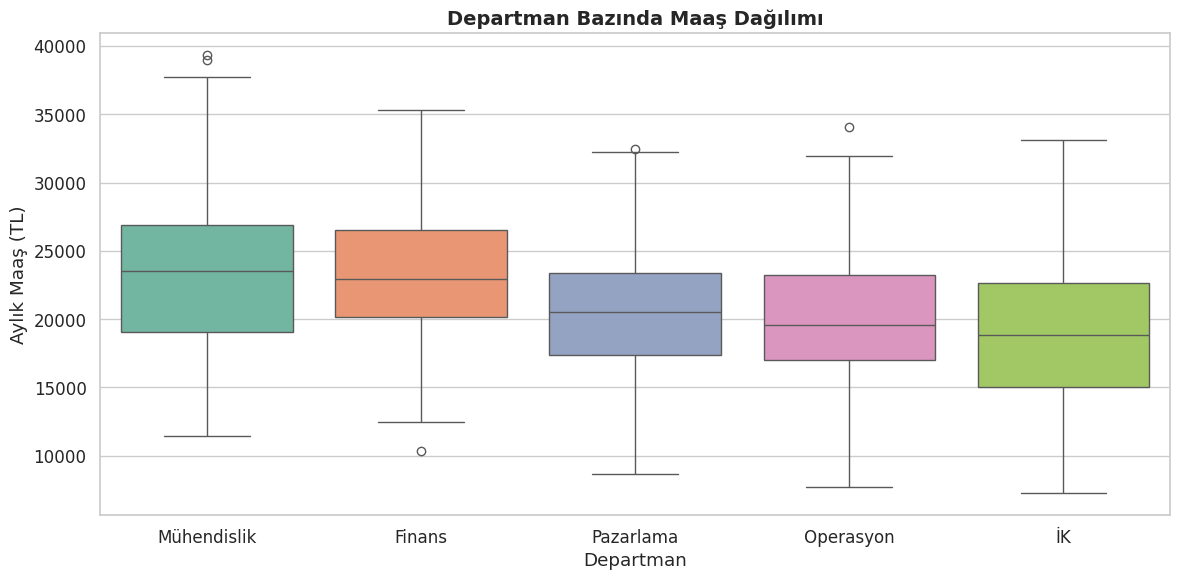

In [ ]:
# HR Örnek: Departman bazında maaş dağılımı (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=hr_data, x='Departman', y='Maas',
            palette='Set2',
            order=['Mühendislik', 'Finans', 'Pazarlama', 'Operasyon', 'İK'])

plt.title('Departman Bazında Maaş Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Departman')
plt.ylabel('Aylık Maaş (TL)')
plt.tight_layout()
plt.show()

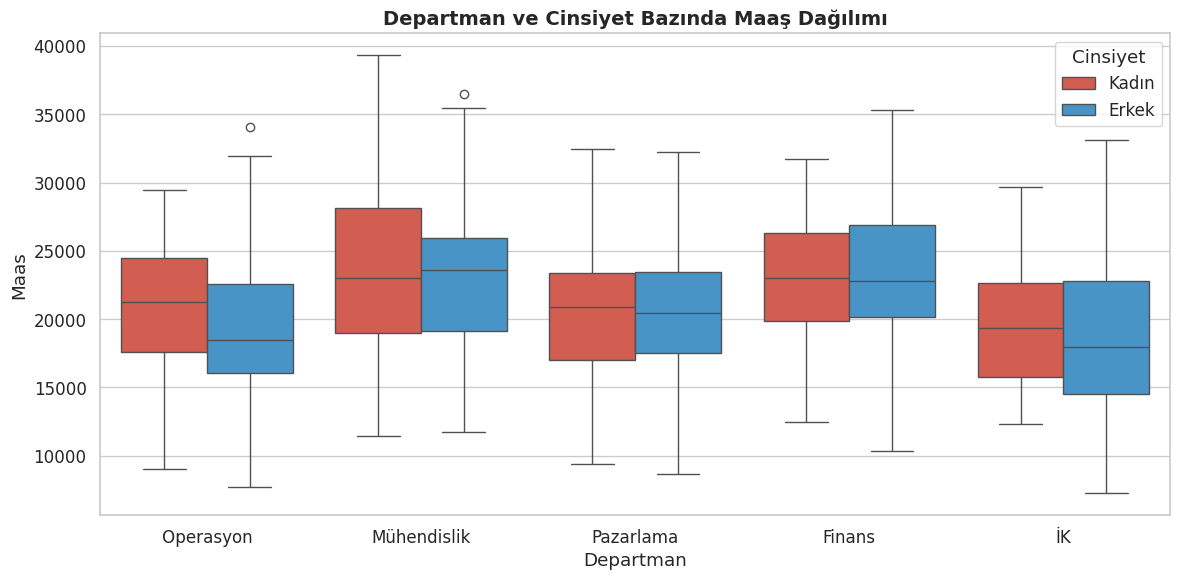

In [ ]:
# Box Plot: Cinsiyet bazında maaş karşılaştırması (hue kullanımı)
plt.figure(figsize=(12, 6))
sns.boxplot(data=hr_data, x='Departman', y='Maas', hue='Cinsiyet',
            palette={'Erkek': '#3498DB', 'Kadın': '#E74C3C'})

plt.title('Departman ve Cinsiyet Bazında Maaş Dağılımı',
          fontsize=14, fontweight='bold')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

---
## 3. Keman Grafiği (Violin Plot)

Keman grafiği, kutu grafiği ve çekirdek yoğunluk (KDE) grafiğinin birleşimidir. Veri dağılımını anlamayı kolaylaştırır çünkü her iki grafik türünü de içerir. Kemanın geniş kısmı yüksek yoğunluğu, dar kısmı düşük yoğunluğu gösterir. Kutu grafiğindeki çeyrekler ve bıyık değerleri kemanın içinde gösterilir.

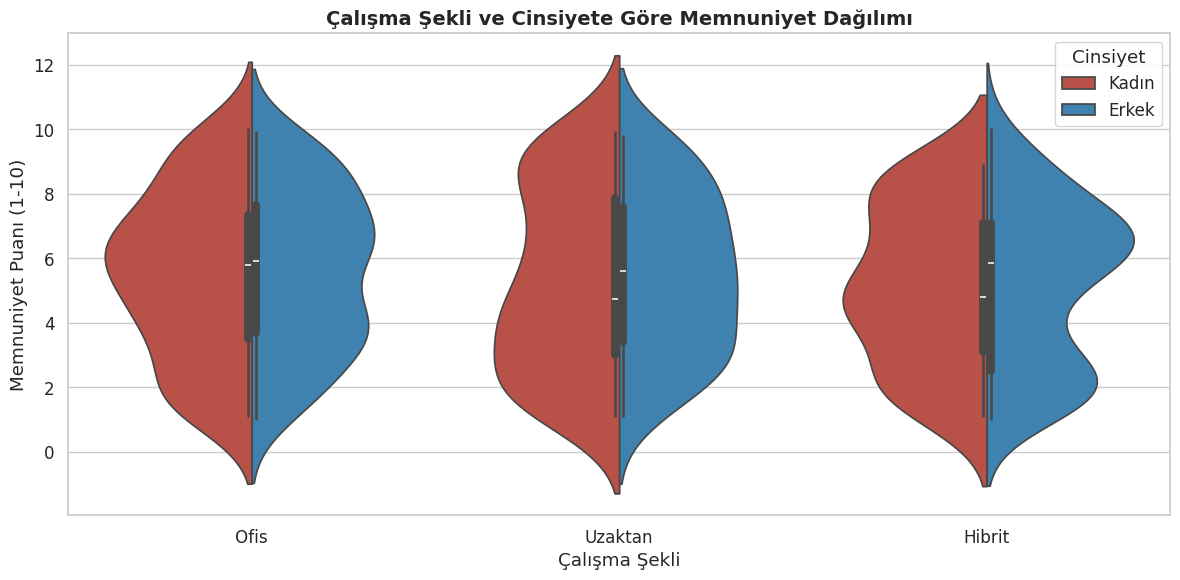

In [ ]:
# HR Örnek: Çalışma şekline göre memnuniyet dağılımı
plt.figure(figsize=(12, 6))
sns.violinplot(data=hr_data, x='Calisma_Sekli', y='Memnuniyet',
               hue='Cinsiyet', split=True,
               palette={'Erkek': '#2E86C1', 'Kadın': '#CB4335'})

plt.title('Çalışma Şekli ve Cinsiyete Göre Memnuniyet Dağılımı',
          fontsize=14, fontweight='bold')
plt.xlabel('Çalışma Şekli')
plt.ylabel('Memnuniyet Puanı (1-10)')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

---
## 4. Nokta Grafiği (Point Plot)

`pointplot()` fonksiyonu ile oluşturulur. Kategorik değişkenin her değeri için bir nokta gösterir ve bu noktaları çizgi segmenti ile birleştirir. Güven aralıkları otomatik olarak eklenir.

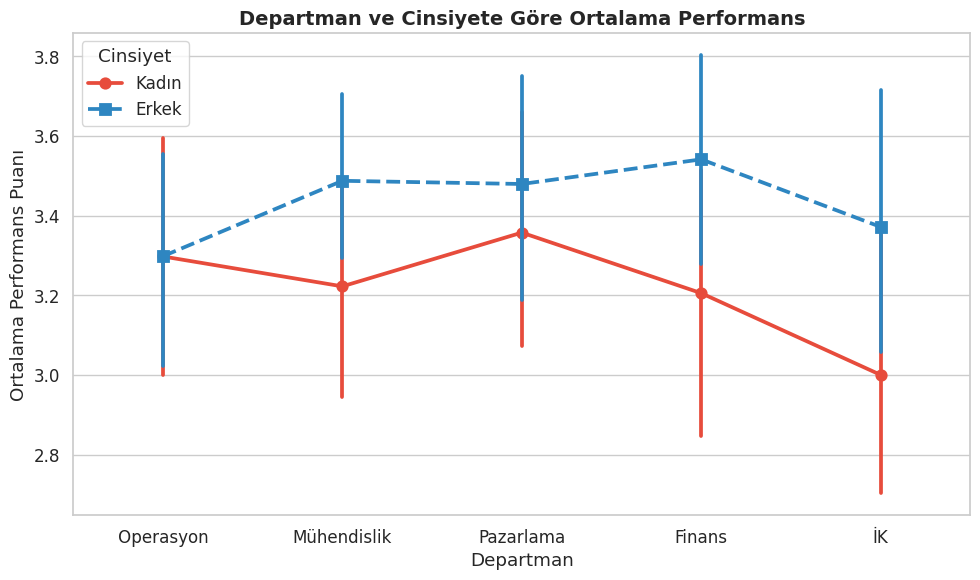

In [ ]:
# HR Örnek: Departman bazında ortalama performans puanı
plt.figure(figsize=(10, 6))
sns.pointplot(data=hr_data, x='Departman', y='Performans_Puani',
              hue='Cinsiyet',
              palette={'Erkek': '#2E86C1', 'Kadın': '#E74C3C'},
              markers=['o', 's'], linestyles=['-', '--'])

plt.title('Departman ve Cinsiyete Göre Ortalama Performans',
          fontsize=14, fontweight='bold')
plt.ylabel('Ortalama Performans Puanı')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

---
## 5. Çizgi Grafiği (Line Plot)

Çizgi grafiği, veri noktalarını çizgi segmentleriyle birleştirerek trendleri belirlemeye yardımcı olur. Genellikle zaman serisi verilerinde kullanılır.

/tmp/ipython-input-858/1915646585.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylar = pd.date_range('2024-01', periods=24, freq='M')


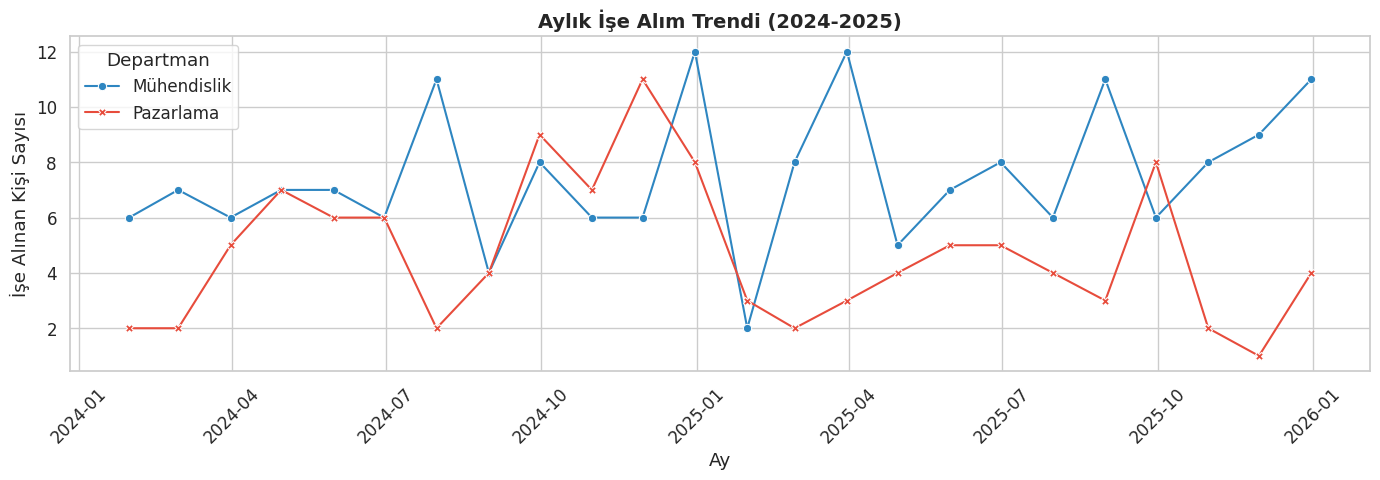

In [ ]:
# HR Örnek: Aylık işe alım trendi (zaman serisi verisi oluştur)
np.random.seed(42)
aylar = pd.date_range('2024-01', periods=24, freq='M')
trend_data = pd.DataFrame({
    'Ay': np.tile(aylar, 2),
    'Departman': np.repeat(['Mühendislik', 'Pazarlama'], 24),
    'Ise_Alim': np.concatenate([
        np.random.poisson(8, 24),
        np.random.poisson(5, 24)
    ])
})

plt.figure(figsize=(14, 5))
sns.lineplot(data=trend_data, x='Ay', y='Ise_Alim',
             hue='Departman', style='Departman',
             markers=True, dashes=False,
             palette={'Mühendislik': '#2E86C1', 'Pazarlama': '#E74C3C'})

plt.title('Aylık İşe Alım Trendi (2024-2025)',
          fontsize=14, fontweight='bold')
plt.ylabel('İşe Alınan Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Departman')
plt.tight_layout()
plt.show()

---
## 6. Sayım Grafiği (Count Plot)

`countplot()` fonksiyonu, belirtilen sütundaki farklı değerlere karşılık gelen gözlem sayısını gösterir. `orient` argümanı ile dikey (`"v"`) veya yatay (`"h"`) yönlendirme yapılabilir.

/tmp/ipython-input-858/4010987736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hr_data, x='Departman', palette='Set2',


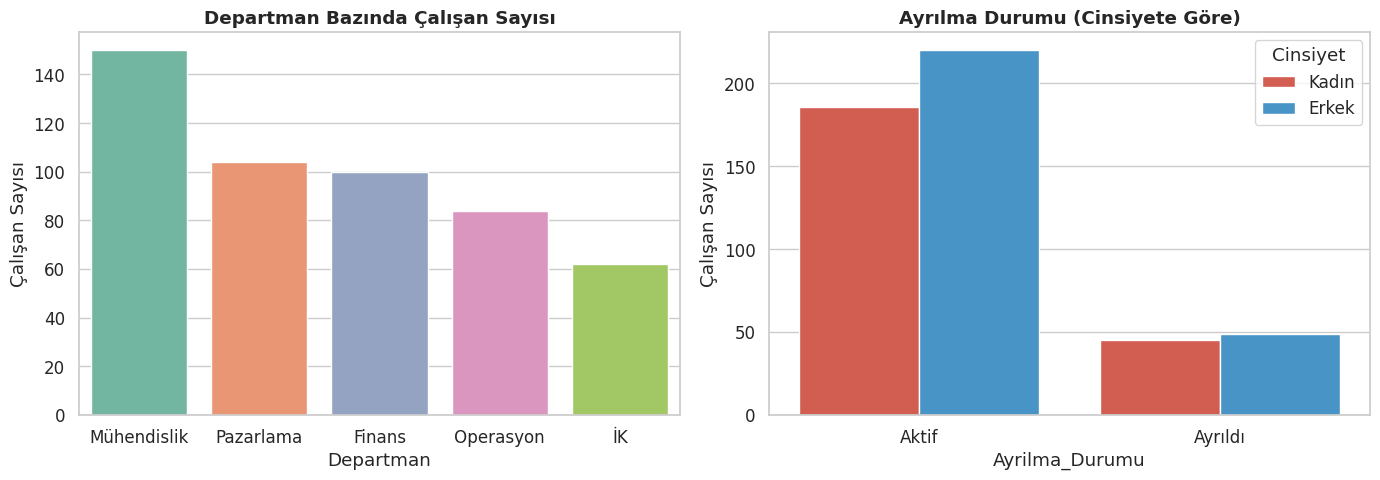

In [ ]:
# HR Örnek: Departman bazında çalışan sayısı
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol: Departman dağılımı
sns.countplot(data=hr_data, x='Departman', palette='Set2',
              order=hr_data['Departman'].value_counts().index,
              ax=axes[0])
axes[0].set_title('Departman Bazında Çalışan Sayısı', fontweight='bold')
axes[0].set_ylabel('Çalışan Sayısı')

# Sağ: Ayrılma durumu + cinsiyet
sns.countplot(data=hr_data, x='Ayrilma_Durumu', hue='Cinsiyet',
              palette={'Erkek': '#3498DB', 'Kadın': '#E74C3C'},
              ax=axes[1])
axes[1].set_title('Ayrılma Durumu (Cinsiyete Göre)', fontweight='bold')
axes[1].set_ylabel('Çalışan Sayısı')
axes[1].legend(title='Cinsiyet')

plt.tight_layout()
plt.show()

---
## 7. Çubuk Grafiği (Bar Plot)

Seaborn'daki `barplot()`, kategorik ve sürekli değişken arasındaki ilişkiyi gösterir. Matplotlib'in `bar()` fonksiyonundan farklı olarak, otomatik güven aralığı hesaplar ve gösterir.

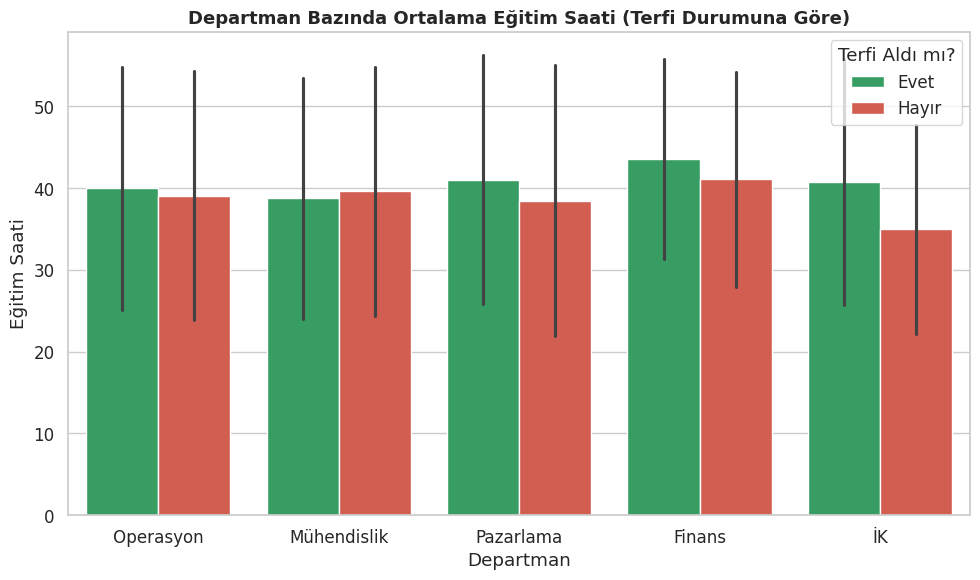

In [ ]:
# HR Örnek: Departman bazında ortalama eğitim saati
plt.figure(figsize=(10, 6))
sns.barplot(data=hr_data, x='Departman', y='Egitim_Saati',
            hue='Terfi_Durumu',
            palette={'Evet': '#27AE60', 'Hayır': '#E74C3C'},
            errorbar='sd')

plt.title('Departman Bazında Ortalama Eğitim Saati (Terfi Durumuna Göre)',
          fontsize=13, fontweight='bold')
plt.ylabel('Eğitim Saati')
plt.legend(title='Terfi Aldı mı?')
plt.tight_layout()
plt.show()

---
## 8. Şerit Grafiği (Strip Plot)

`stripplot()` fonksiyonu, kategorik değişkenlerden biri ile kullanılır ve verileri sıralı şekilde gösterir. Noktaların üst üste binme sorunu `jitter=True` parametresi ile rastgele gürültü eklenerek çözülür.

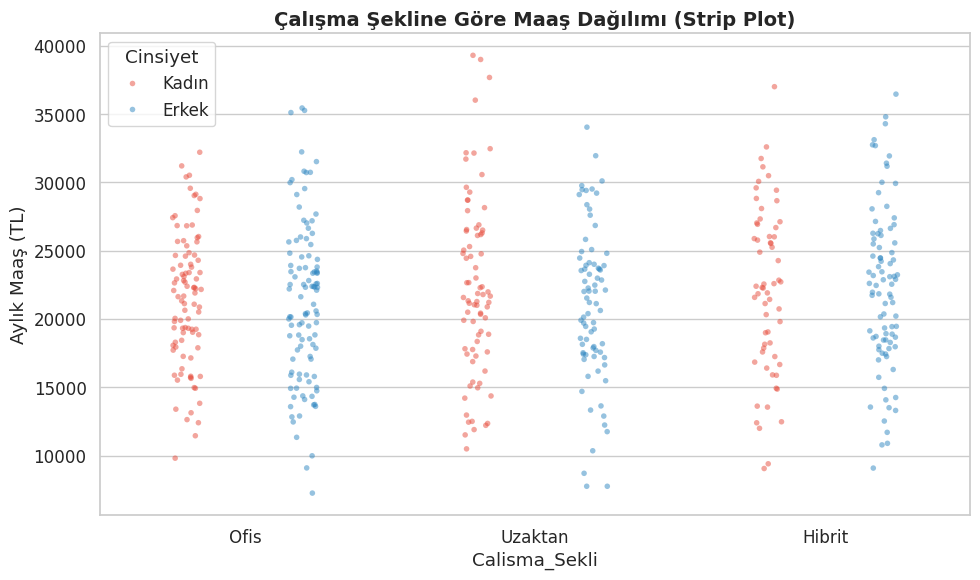

In [ ]:
# HR Örnek: Çalışma şekline göre maaş dağılımı (Strip Plot)
plt.figure(figsize=(10, 6))
sns.stripplot(data=hr_data, x='Calisma_Sekli', y='Maas',
              hue='Cinsiyet', jitter=True, dodge=True,
              palette={'Erkek': '#2E86C1', 'Kadın': '#E74C3C'},
              alpha=0.5, size=4)

plt.title('Çalışma Şekline Göre Maaş Dağılımı (Strip Plot)',
          fontsize=14, fontweight='bold')
plt.ylabel('Aylık Maaş (TL)')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

---
## 9. Sürü Grafiği (Swarm Plot)

`swarmplot()` fonksiyonu, şerit grafiğindeki `jitter`'a alternatif olarak her noktayı kategorik eksen üzerinde üst üste binmeyecek şekilde konumlandırır. Böylece tüm gözlemler net biçimde görülebilir.

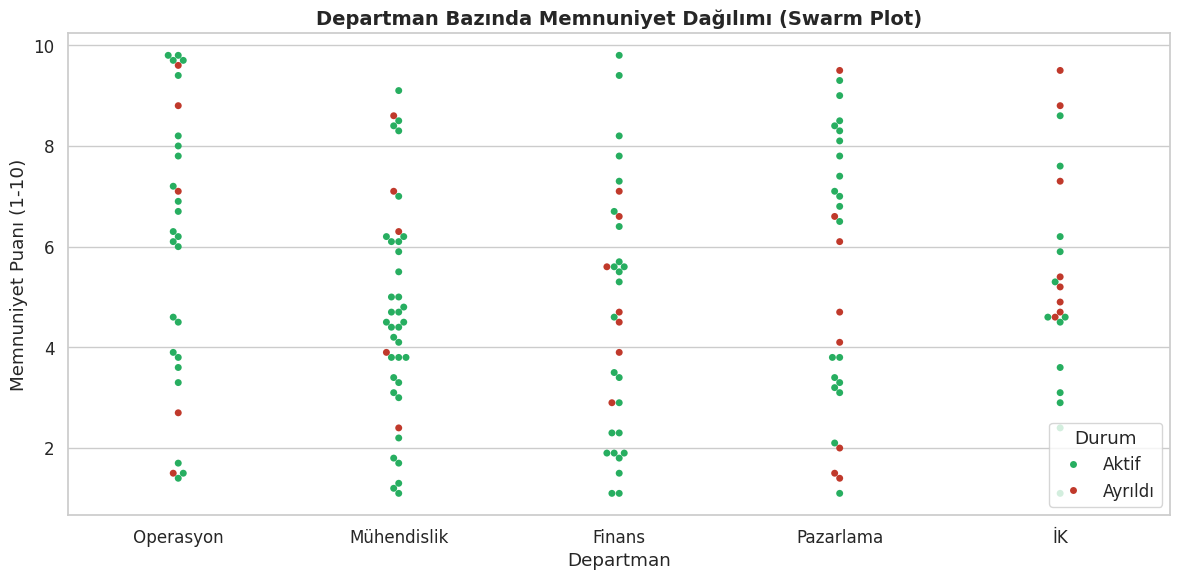

In [ ]:
# HR Örnek: Performans puanı dağılımı (Swarm Plot)
# Büyük veri setleri için alt örneklem alalım
hr_sample = hr_data.sample(150, random_state=42)

plt.figure(figsize=(12, 6))
sns.swarmplot(data=hr_sample, x='Departman', y='Memnuniyet',
              hue='Ayrilma_Durumu',
              palette={'Aktif': '#27AE60', 'Ayrıldı': '#C0392B'},
              size=5)

plt.title('Departman Bazında Memnuniyet Dağılımı (Swarm Plot)',
          fontsize=14, fontweight='bold')
plt.ylabel('Memnuniyet Puanı (1-10)')
plt.legend(title='Durum')
plt.tight_layout()
plt.show()

---
## 10. Faktör Grafiği (catplot – eski adıyla factorplot)

`catplot()` fonksiyonu, kategorik verileri bir facet grid üzerinde çizer. `kind` parametresi ile farklı grafik türleri seçilebilir: `box`, `violin`, `bar`, `count`, `strip`, `swarm`, `point`.

**`col`** argümanı ile üçüncü bir kategorik değişkene göre ayrı paneller oluşturulur. **`col_wrap`** ile bir satırdaki panel sayısı sınırlandırılır.

/tmp/ipython-input-858/3178875717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=hr_data, x='Calisma_Sekli', y='Maas',


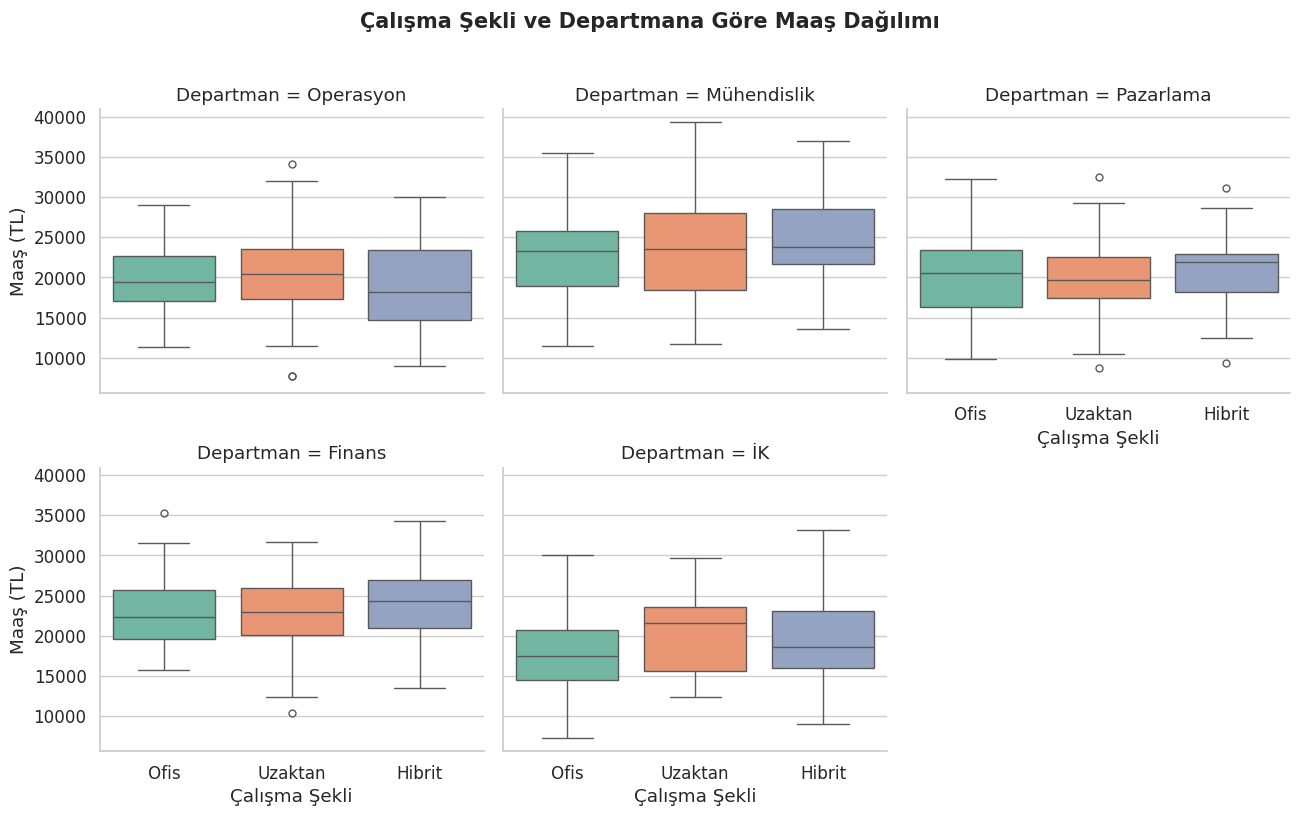

In [ ]:
# HR Örnek: Çalışma şekline göre maaş dağılımı (departman panelleri)
g = sns.catplot(data=hr_data, x='Calisma_Sekli', y='Maas',
                col='Departman', col_wrap=3,
                kind='box', palette='Set2',
                height=4, aspect=1.1)

g.figure.suptitle('Çalışma Şekli ve Departmana Göre Maaş Dağılımı',
                   fontsize=15, fontweight='bold', y=1.02)
g.set_axis_labels('Çalışma Şekli', 'Maaş (TL)')
plt.tight_layout()
plt.show()

---
## 11. Facet Grid

`FacetGrid`, bir veri setinin alt kümelerinde bir değişkenin dağılımını veya birden fazla değişken arasındaki ilişkiyi ayrı panellerde görselleştirir. Üç boyut kullanılabilir: **row**, **col** ve **hue**. `FacetGrid.map()` metodu ile istenilen grafik türü çizilir.

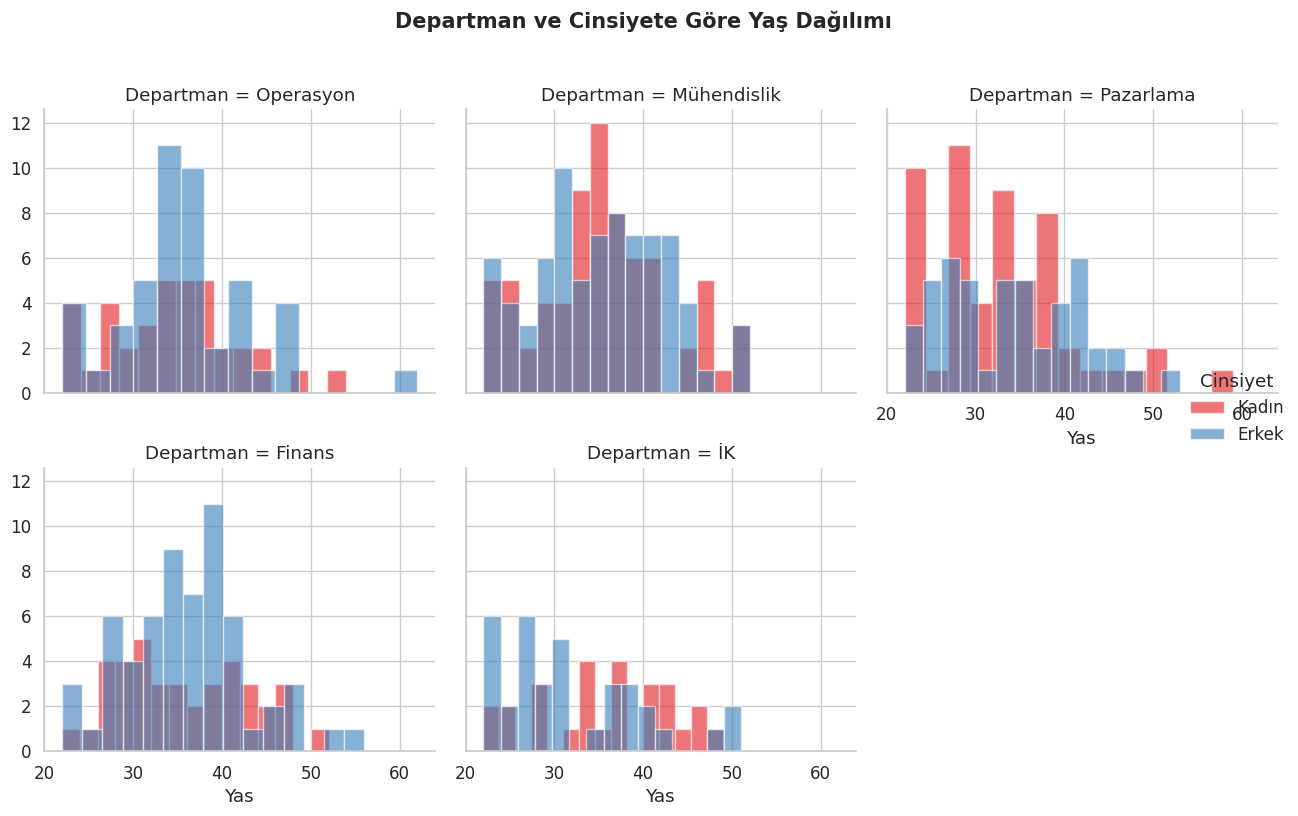

In [ ]:
# HR Örnek: FacetGrid ile yaş dağılımı
g = sns.FacetGrid(hr_data, col='Departman', hue='Cinsiyet',
                  col_wrap=3, height=4, palette='Set1')
g.map(plt.hist, 'Yas', alpha=0.6, bins=15, edgecolor='white')
g.add_legend(title='Cinsiyet')
g.figure.suptitle('Departman ve Cinsiyete Göre Yaş Dağılımı',
                   fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
# BÖLÜM B – Sürekli Değişkenler için Görselleştirme
---

## 12. Dağılım Grafiği (Scatter Plot)

`scatterplot()` fonksiyonu ile sürekli iki değişken arasındaki ilişki görselleştirilir. Kartezyen düzlemde birçok nokta gösterir; her nokta iki değişkenin değerini temsil eder.

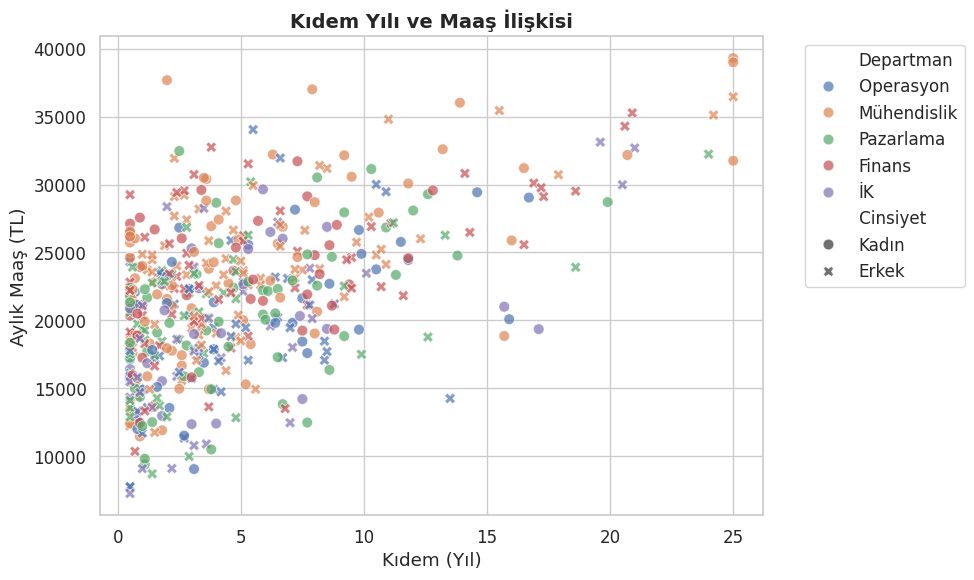

In [ ]:
# HR Örnek: Kıdem ve maaş ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hr_data, x='Kidem_Yil', y='Maas',
                hue='Departman', style='Cinsiyet',
                palette='deep', alpha=0.7, s=60)

plt.title('Kıdem Yılı ve Maaş İlişkisi',
          fontsize=14, fontweight='bold')
plt.xlabel('Kıdem (Yıl)')
plt.ylabel('Aylık Maaş (TL)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---
## 13. Regresyon Grafiği (Regression Plot)

Seaborn'da doğrusal ilişkiyi görselleştirmek için iki ana fonksiyon bulunur: `regplot()` ve `lmplot()`. Bu fonksiyonlar, dağılım grafiği üzerine en iyi uyum çizgisini çizer.

- **`regplot()`**: NumPy dizileri, Pandas değişkenleri gibi farklı formatları kabul eder
- **`lmplot()`**: Değişkenleri string olarak alır, `hue`/`col`/`row` ile facet destekler
- **`order`** parametresi ile polinom regresyon dereceleri değiştirilebilir (doğrusal olmayan veriler için)

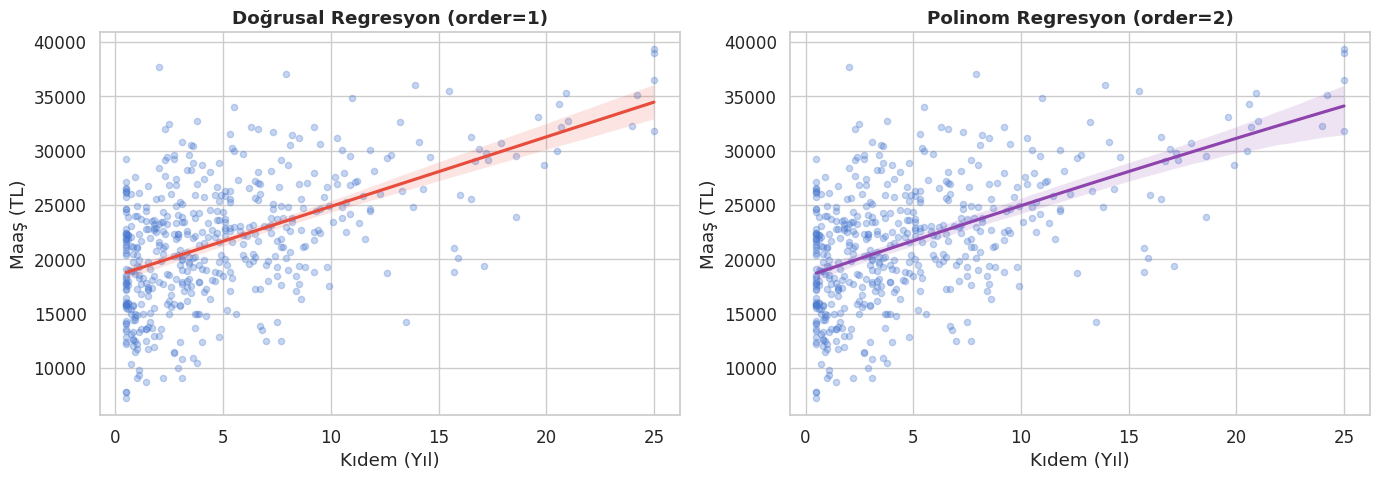

In [ ]:
# HR Örnek: Kıdem-Maaş regresyon analizi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol: Doğrusal regresyon
sns.regplot(data=hr_data, x='Kidem_Yil', y='Maas',
            scatter_kws={'alpha': 0.3, 's': 20},
            line_kws={'color': '#E74C3C'},
            ax=axes[0])
axes[0].set_title('Doğrusal Regresyon (order=1)', fontweight='bold')
axes[0].set_xlabel('Kıdem (Yıl)')
axes[0].set_ylabel('Maaş (TL)')

# Sağ: Polinom regresyon
sns.regplot(data=hr_data, x='Kidem_Yil', y='Maas',
            order=2,
            scatter_kws={'alpha': 0.3, 's': 20},
            line_kws={'color': '#8E44AD'},
            ax=axes[1])
axes[1].set_title('Polinom Regresyon (order=2)', fontweight='bold')
axes[1].set_xlabel('Kıdem (Yıl)')
axes[1].set_ylabel('Maaş (TL)')

plt.tight_layout()
plt.show()

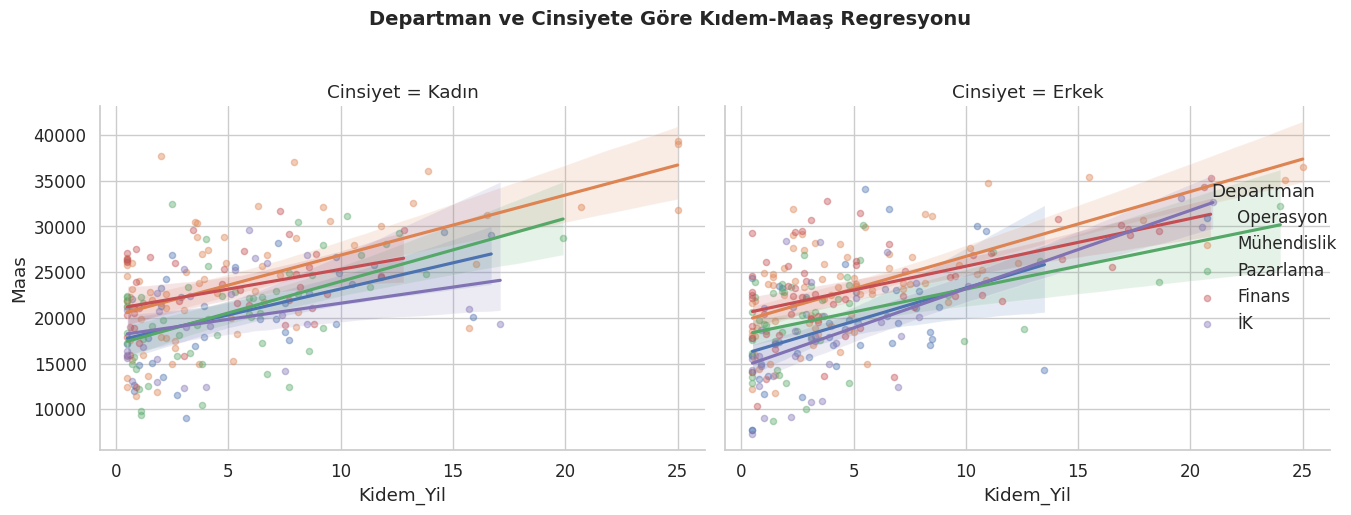

In [ ]:
# lmplot ile departman bazında regresyon
g = sns.lmplot(data=hr_data, x='Kidem_Yil', y='Maas',
               hue='Departman', col='Cinsiyet',
               height=5, aspect=1.2,
               scatter_kws={'alpha': 0.4, 's': 20},
               palette='deep')

g.figure.suptitle('Departman ve Cinsiyete Göre Kıdem-Maaş Regresyonu',
                   fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

---
## 14. Isı Haritası (Heat Map)

Isı haritası, bir matristeki değerleri renklerle temsil eden iki boyutlu bir grafik gösterimidir. Özellikle değişkenler arası **korelasyonları** görselleştirmek için çok kullanışlıdır.

Önemli `cmap` değerleri: `Blues`, `RdYlGn`, `RdYlBu`, `Greens`, `Oranges`, `Reds`, `plasma`, `magma`, `seismic`, `coolwarm` vb.

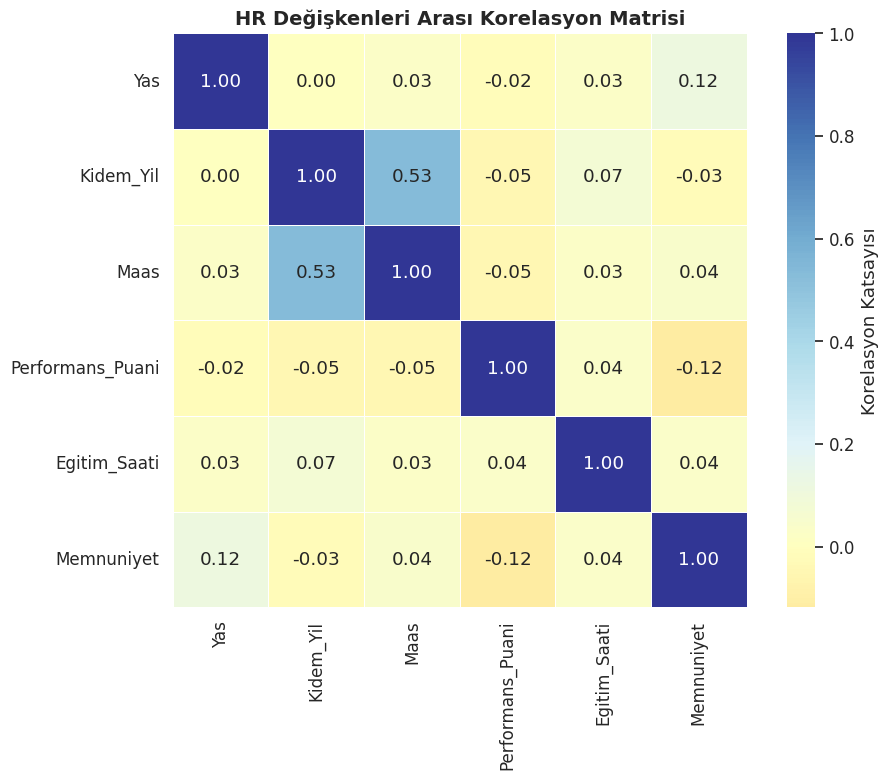

In [ ]:
# HR Örnek: Sayısal değişkenler arası korelasyon ısı haritası
sayisal_sutunlar = ['Yas', 'Kidem_Yil', 'Maas', 'Performans_Puani',
                    'Egitim_Saati', 'Memnuniyet']
korelasyon = hr_data[sayisal_sutunlar].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon, annot=True, fmt='.2f',
            cmap='RdYlBu', center=0,
            linewidths=0.5, linecolor='white',
            square=True,
            cbar_kws={'label': 'Korelasyon Katsayısı'})

plt.title('HR Değişkenleri Arası Korelasyon Matrisi',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Korelasyon Yorumlama:**
- Koyu mavi → güçlü pozitif korelasyon (+1)
- Koyu kırmızı → güçlü negatif korelasyon (-1)
- Sarı/beyaz → korelasyon yok (0)

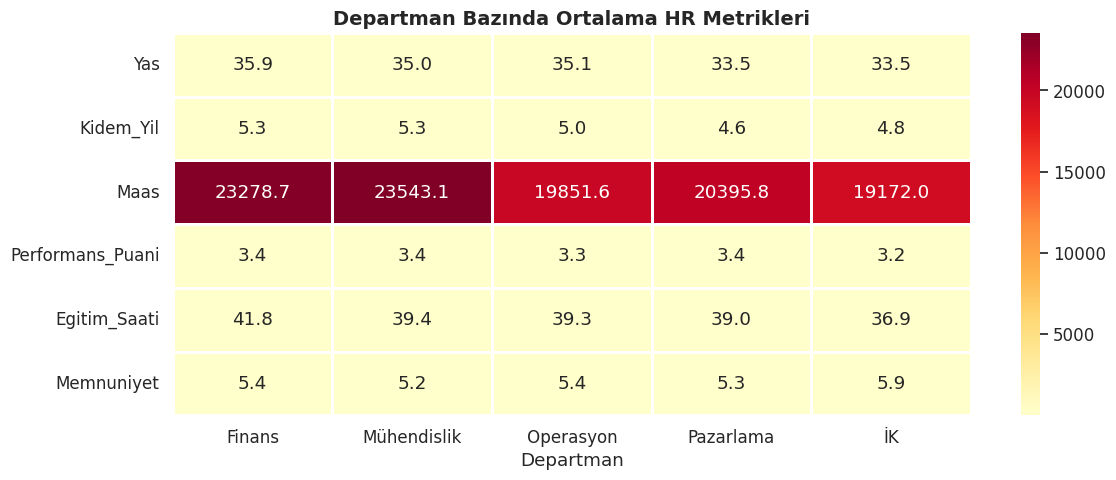

In [ ]:
# HR Örnek: Departman bazında ortalama metrikler ısı haritası
dept_ozet = hr_data.groupby('Departman')[sayisal_sutunlar].mean()

plt.figure(figsize=(12, 5))
sns.heatmap(dept_ozet.T, annot=True, fmt='.1f',
            cmap='YlOrRd', linewidths=1, linecolor='white')

plt.title('Departman Bazında Ortalama HR Metrikleri',
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

---
## 15. Tek Değişkenli Dağılım Grafiği (Distribution Plot)

Veri analizi yaparken en önce anlaşılması gereken şey verinin dağılımıdır. `histplot()` (veya eski sürümlerde `distplot()`) fonksiyonu, histogram ve çekirdek yoğunluk tahmini (KDE) ile parametrik dağılımı görselleştirir.

- **`kde=True`**: Çekirdek yoğunluk eğrisini gösterir
- **`bins`**: Histogram çubuklarının sayısını belirler

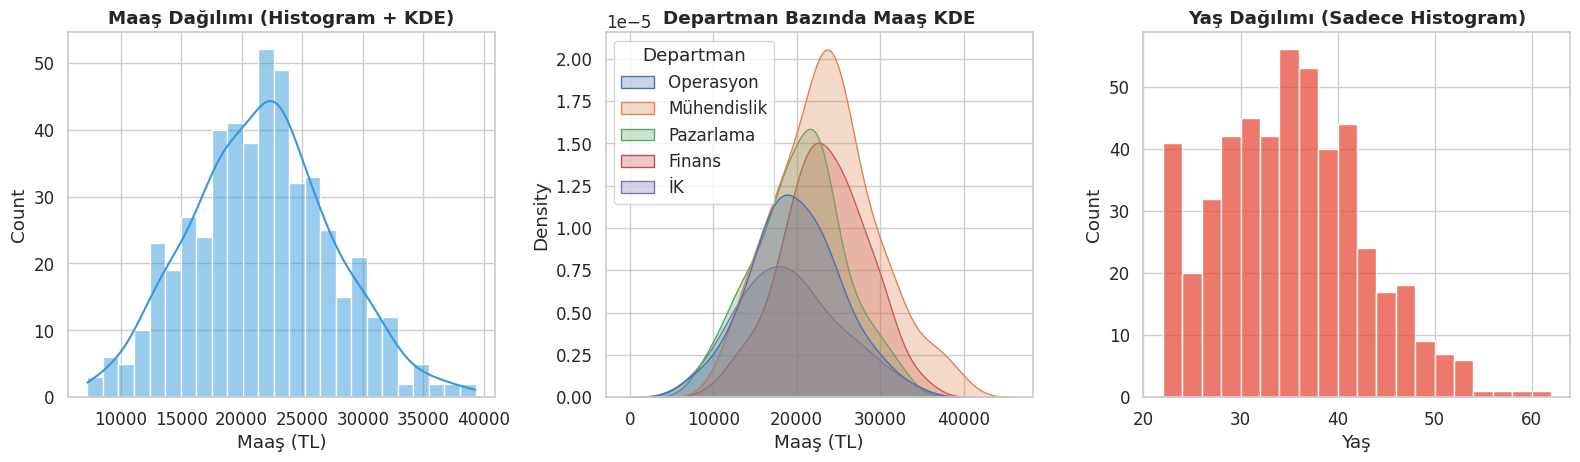

In [ ]:
# HR Örnek: Maaş ve yaş dağılımları
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1) Histogram + KDE
sns.histplot(hr_data['Maas'], bins=25, kde=True,
             color='#3498DB', ax=axes[0])
axes[0].set_title('Maaş Dağılımı (Histogram + KDE)', fontweight='bold')
axes[0].set_xlabel('Maaş (TL)')

# 2) Sadece KDE
sns.kdeplot(data=hr_data, x='Maas', hue='Departman',
            fill=True, alpha=0.3, palette='deep', ax=axes[1])
axes[1].set_title('Departman Bazında Maaş KDE', fontweight='bold')
axes[1].set_xlabel('Maaş (TL)')

# 3) Sadece Histogram
sns.histplot(hr_data['Yas'], bins=20, kde=False,
             color='#E74C3C', ax=axes[2])
axes[2].set_title('Yaş Dağılımı (Sadece Histogram)', fontweight='bold')
axes[2].set_xlabel('Yaş')

plt.tight_layout()
plt.show()

---
## 16. Birleşik Grafik (Joint Plot)

`jointplot()`, iki değişken arasındaki ilişkiyi ve her değişkenin tek başına dağılımını aynı anda gösteren çok panelli bir grafik oluşturur. `kind` argümanı ile farklı türler seçilebilir: `scatter`, `reg`, `hex`, `kde`.

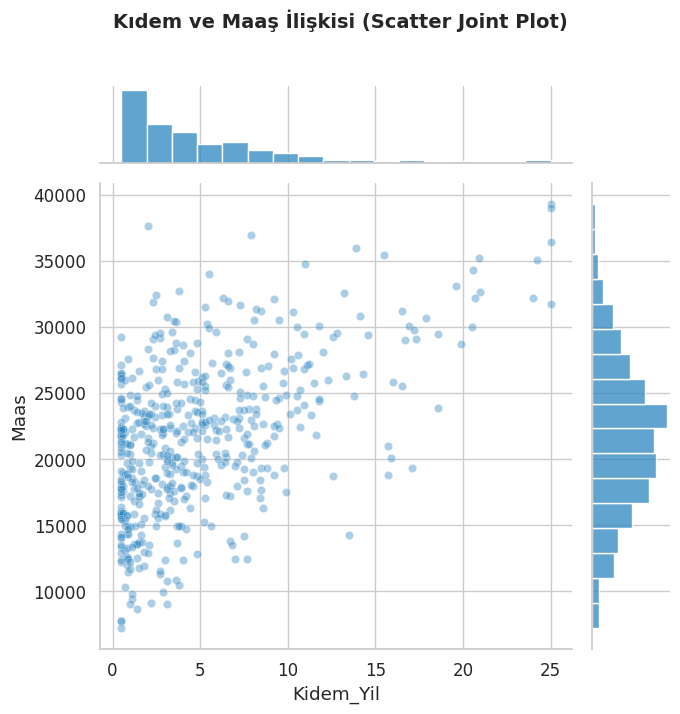

In [ ]:
# HR Örnek: Kıdem ve maaş birleşik grafiği (scatter)
g = sns.jointplot(data=hr_data, x='Kidem_Yil', y='Maas',
                  kind='scatter', color='#2E86C1',
                  height=7, alpha=0.4)
g.figure.suptitle('Kıdem ve Maaş İlişkisi (Scatter Joint Plot)',
                   fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

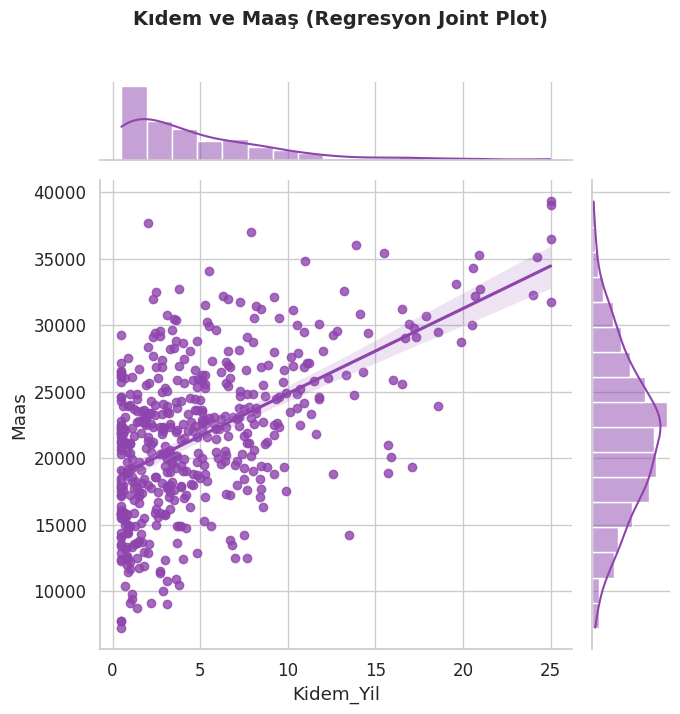

In [ ]:
# Joint Plot: Regresyon türünde
g = sns.jointplot(data=hr_data, x='Kidem_Yil', y='Maas',
                  kind='reg', color='#8E44AD',
                  height=7)
g.figure.suptitle('Kıdem ve Maaş (Regresyon Joint Plot)',
                   fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 17. Hexbin Birleşik Grafik

Hexagonal binning, iki değişkenli veri analizinde verinin seyrek yoğunlukta olduğu, yani noktaların çok dağınık olduğu ve scatter plot ile analiz edilmesinin zor olduğu durumlarda kullanılır. `jointplot()` fonksiyonunda `kind='hex'` ile oluşturulur.

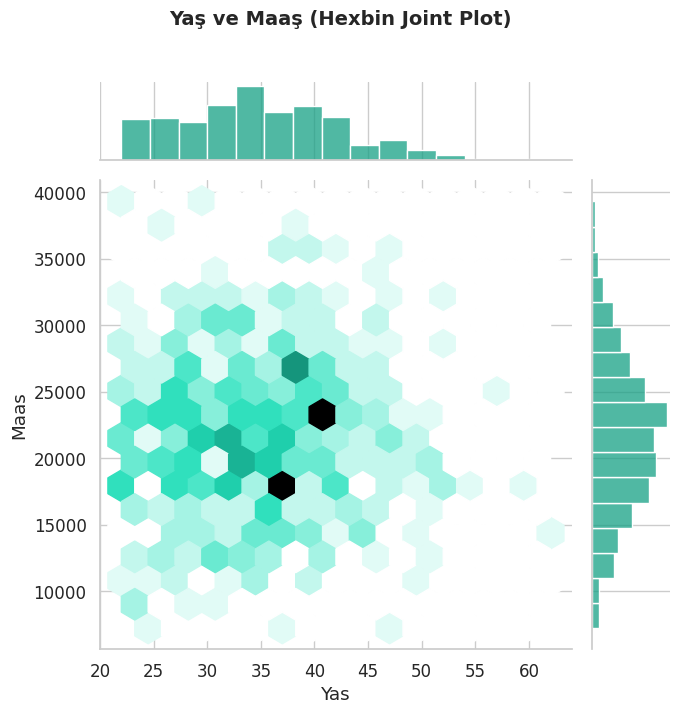

In [ ]:
# HR Örnek: Yaş ve maaş hexbin grafiği
g = sns.jointplot(data=hr_data, x='Yas', y='Maas',
                  kind='hex', color='#16A085',
                  height=7)
g.figure.suptitle('Yaş ve Maaş (Hexbin Joint Plot)',
                   fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 18. KDE Birleşik Grafik

Çekirdek yoğunluk tahmini (KDE) birleşik grafiği, `jointplot()` fonksiyonunda `kind='kde'` ile oluşturulur. İki değişken arasındaki yoğunluk bölgelerini gösterir.

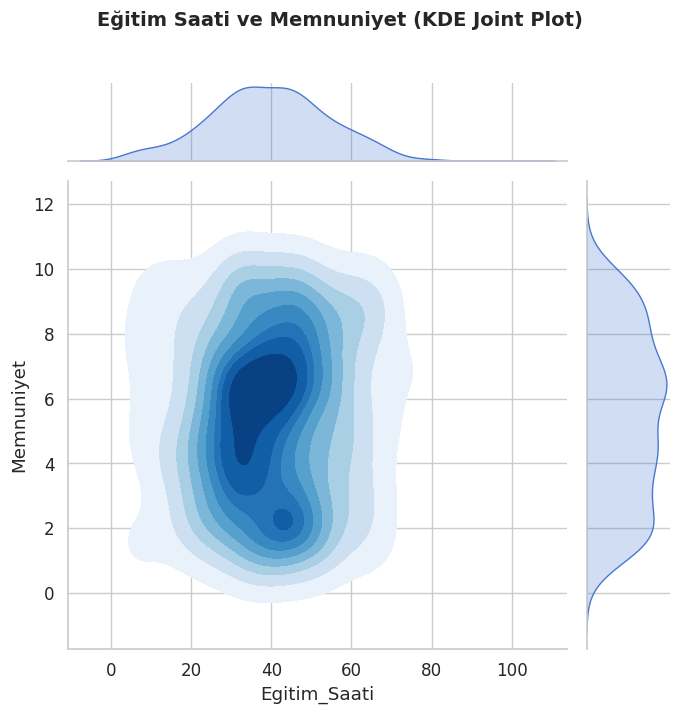

In [ ]:
# HR Örnek: Eğitim saati ve memnuniyet KDE
g = sns.jointplot(data=hr_data, x='Egitim_Saati', y='Memnuniyet',
                  kind='kde', fill=True,
                  cmap='Blues', height=7)
g.figure.suptitle('Eğitim Saati ve Memnuniyet (KDE Joint Plot)',
                   fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 19. Çift Grafik (Pair Plot)

`pairplot()` fonksiyonu, çok değişkenli verileri temsil etmek için kullanılır. Tüm sürekli değişken çiftleri arasında dağılım grafikleri, köşegen üzerinde ise histogram veya KDE çizer.

**Söz dizimi:** `seaborn.pairplot(data, vars=, hue=, palette=, diag_kind=)`
- `vars`: Hangi değişkenler için çizileceğini belirler
- `hue`: Renk bazında ayrım yapılacak kategorik değişken
- `palette`: Renk paleti (Deep, Muted, Bright, Pastel, Dark, Colorblind vb.)
- `kind`: Köşegen dışı grafikler (`scatter` veya `reg`)
- `diag_kind`: Köşegen grafikler (`hist` veya `kde`)

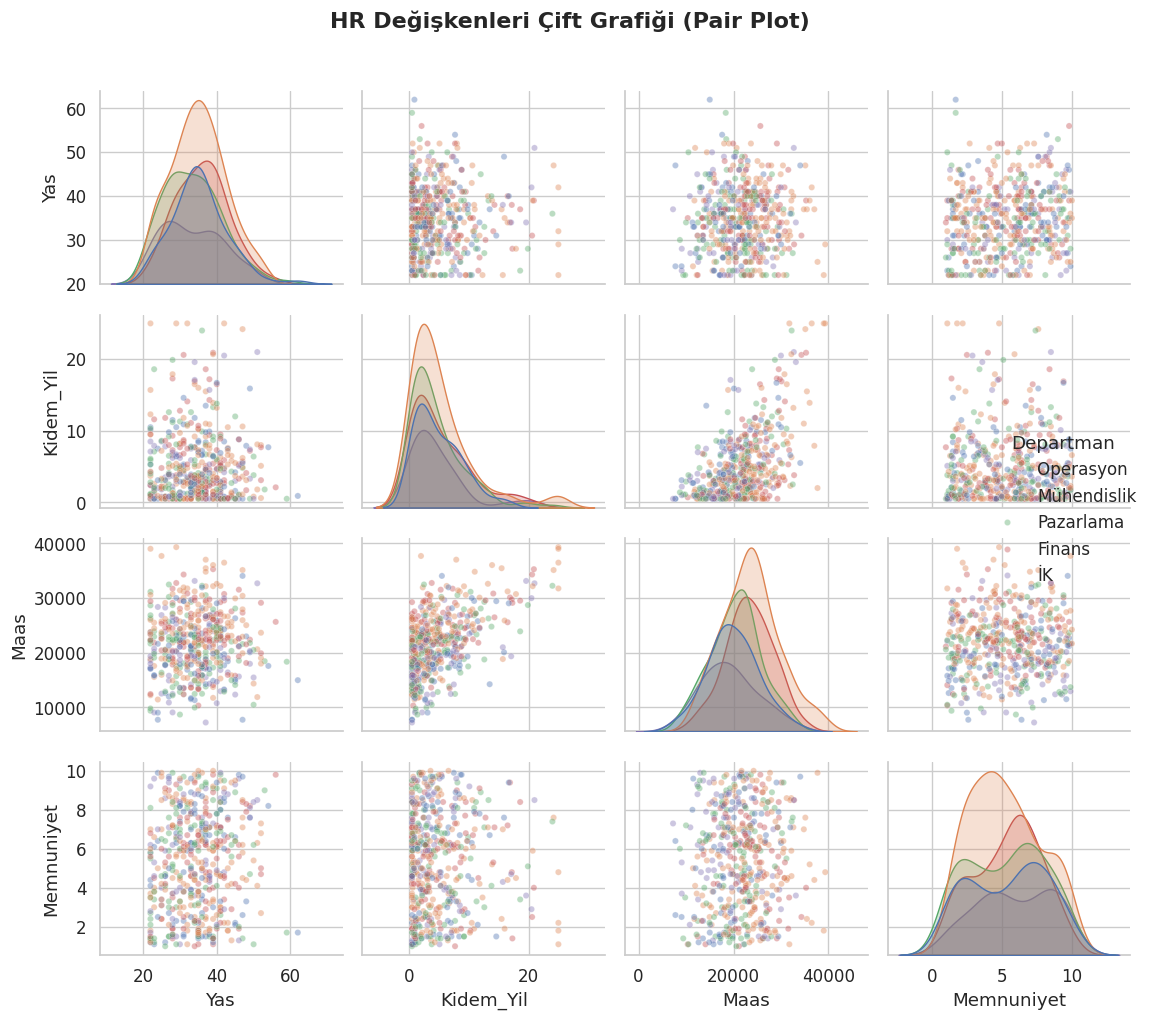

In [ ]:
# HR Örnek: Seçili değişkenler için pair plot
secili_sutunlar = ['Yas', 'Kidem_Yil', 'Maas', 'Memnuniyet']

g = sns.pairplot(hr_data, vars=secili_sutunlar,
                 hue='Departman', diag_kind='kde',
                 palette='deep', plot_kws={'alpha': 0.4, 's': 20},
                 height=2.5)

g.figure.suptitle('HR Değişkenleri Çift Grafiği (Pair Plot)',
                   fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 20. Çift Izgara (Pair Grid)

`PairGrid`, pair plot'tan farklı olarak köşegen, üst üçgen ve alt üçgende farklı grafik türleri çizmeye olanak tanır:
- `map_diag()`: Köşegen grafikleri (tek değişkenli dağılım)
- `map_upper()`: Üst üçgen grafikleri
- `map_lower()`: Alt üçgen grafikleri
- `map_offdiag()`: Köşegen dışı tüm grafikler

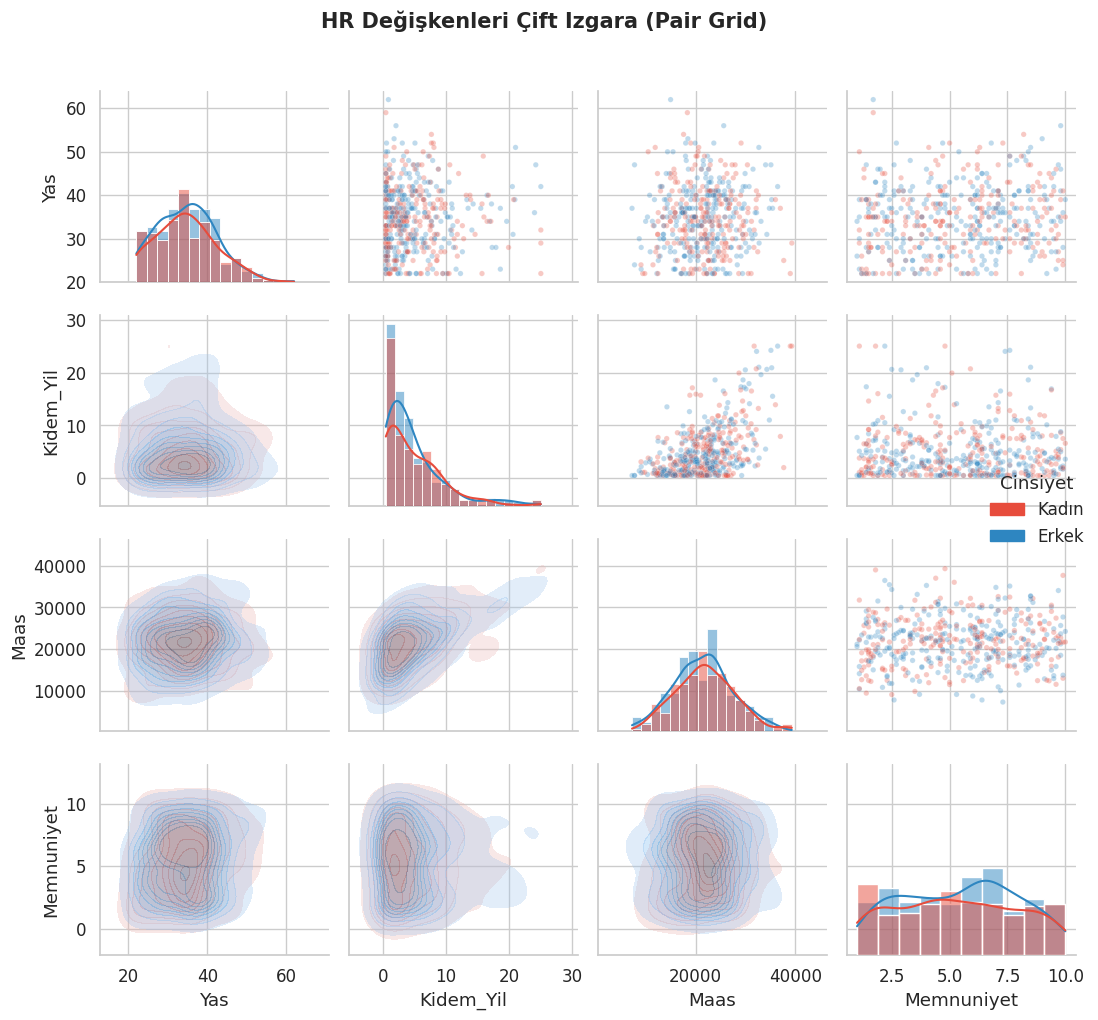

In [ ]:
# HR Örnek: PairGrid ile farklı grafik türleri
secili = ['Yas', 'Kidem_Yil', 'Maas', 'Memnuniyet']

g = sns.PairGrid(hr_data, vars=secili, hue='Cinsiyet',
                 palette={'Erkek': '#2E86C1', 'Kadın': '#E74C3C'})

g.map_upper(sns.scatterplot, alpha=0.3, s=15)
g.map_lower(sns.kdeplot, fill=True, alpha=0.3)
g.map_diag(sns.histplot, kde=True, alpha=0.5)

g.add_legend(title='Cinsiyet')
g.figure.suptitle('HR Değişkenleri Çift Izgara (Pair Grid)',
                   fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 21. Renk Paletleri (Color Palettes)

Seaborn'da `set_palette()` fonksiyonu ile grafiklere estetik değer katılır. İki ana palet türü vardır:

- **Sıralı (Sequential)**: Düşükten yükseğe doğru renk değişimi gösterir (ör. `Greens`, `Reds`, `Blues`)
- **Iraksak (Diverging)**: İki farklı renk kullanır, ortak bir noktadan her iki yöne farklı renk ayrışması gösterir (ör. `RdBu`, `coolwarm`, `BrBG`)

/tmp/ipython-input-858/2439989897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_data, x='Departman', y='Maas',
/tmp/ipython-input-858/2439989897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_data, x='Departman', y='Maas',
/tmp/ipython-input-858/2439989897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_data, x='Departman', y='Maas',
/tmp/ipython-input-858/2439989897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

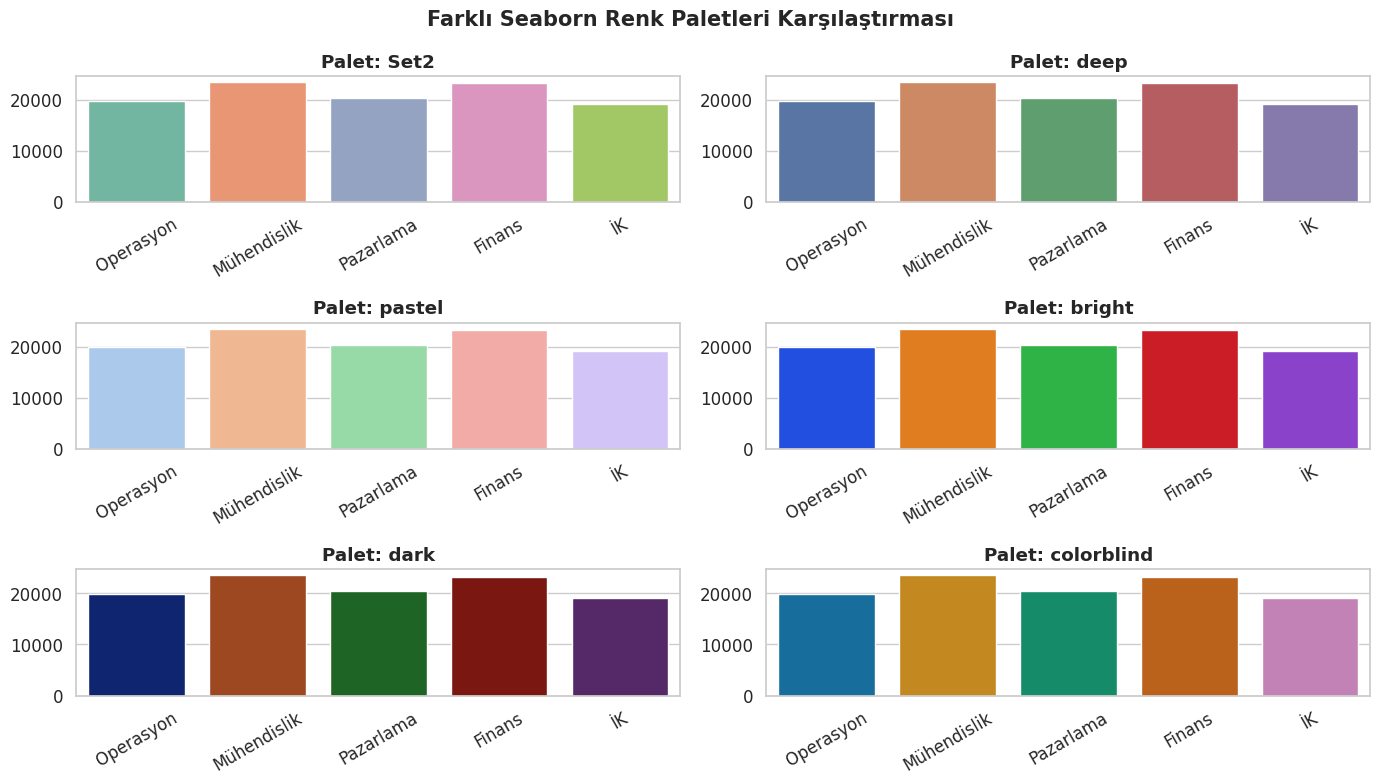

In [ ]:
# Popüler Seaborn renk paletleri gösterimi
fig, axes = plt.subplots(3, 2, figsize=(14, 8))

paletler = ['Set2', 'deep', 'pastel', 'bright', 'dark', 'colorblind']
for ax, pal in zip(axes.flat, paletler):
    sns.barplot(data=hr_data, x='Departman', y='Maas',
               palette=pal, ax=ax, errorbar=None)
    ax.set_title(f'Palet: {pal}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=30)

plt.suptitle('Farklı Seaborn Renk Paletleri Karşılaştırması',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

---
# BÖLÜM C – Uygulama ve Sorular
---

## 22. HR Analitik Dashboard Uygulaması

Aşağıdaki kapsamlı örnek, Seaborn'un farklı grafik türlerini tek bir dashboard'da birleştirir:

/tmp/ipython-input-858/2626206292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_data, x='Departman', y='Maas',
/tmp/ipython-input-858/2626206292.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hr_data, x='Calisma_Sekli', y='Memnuniyet',
/tmp/ipython-input-858/2626206292.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_data, x='Departman', y='Performans_Puani',


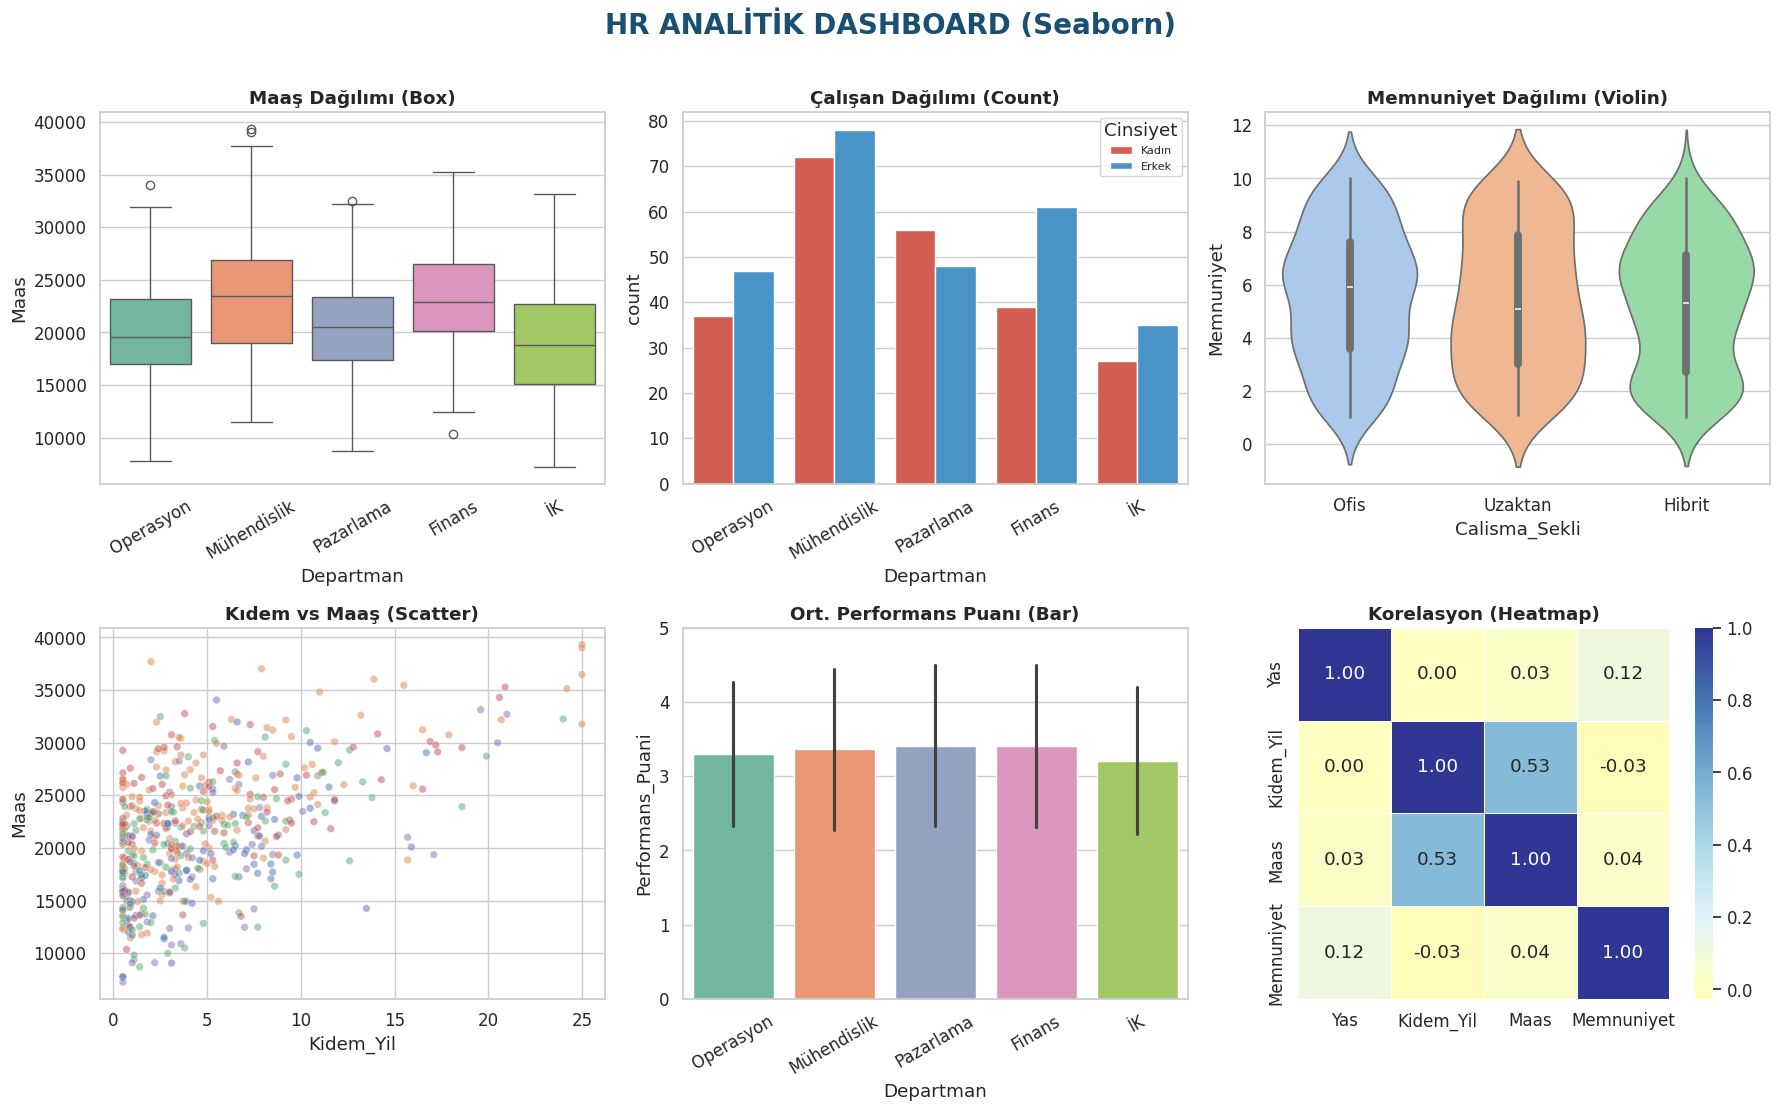

Dashboard başarıyla oluşturuldu! ✅


In [ ]:
# === KAPSAMLI HR SEABORN DASHBOARD ===
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('HR ANALİTİK DASHBOARD (Seaborn)',
             fontsize=20, fontweight='bold', color='#1B4F72', y=1.01)

# 1) Departman maaş dağılımı (Box Plot)
sns.boxplot(data=hr_data, x='Departman', y='Maas',
            palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Maaş Dağılımı (Box)', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=30)

# 2) Çalışan sayısı (Count Plot)
sns.countplot(data=hr_data, x='Departman', hue='Cinsiyet',
              palette={'Erkek': '#3498DB', 'Kadın': '#E74C3C'},
              ax=axes[0, 1])
axes[0, 1].set_title('Çalışan Dağılımı (Count)', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=30)
axes[0, 1].legend(title='Cinsiyet', fontsize=8)

# 3) Memnuniyet dağılımı (Violin)
sns.violinplot(data=hr_data, x='Calisma_Sekli', y='Memnuniyet',
               palette='pastel', ax=axes[0, 2])
axes[0, 2].set_title('Memnuniyet Dağılımı (Violin)', fontweight='bold')

# 4) Kıdem-Maaş ilişkisi (Scatter)
sns.scatterplot(data=hr_data, x='Kidem_Yil', y='Maas',
                hue='Departman', alpha=0.5, s=30,
                palette='deep', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Kıdem vs Maaş (Scatter)', fontweight='bold')

# 5) Performans puanı (Bar Plot)
sns.barplot(data=hr_data, x='Departman', y='Performans_Puani',
            palette='Set2', ax=axes[1, 1], errorbar='sd')
axes[1, 1].set_title('Ort. Performans Puanı (Bar)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=30)
axes[1, 1].set_ylim(0, 5)

# 6) Korelasyon (Heat Map)
sayisal = ['Yas', 'Kidem_Yil', 'Maas', 'Memnuniyet']
sns.heatmap(hr_data[sayisal].corr(), annot=True, fmt='.2f',
            cmap='RdYlBu', center=0, ax=axes[1, 2],
            square=True, linewidths=0.5)
axes[1, 2].set_title('Korelasyon (Heatmap)', fontweight='bold')

plt.tight_layout()
plt.savefig('hr_seaborn_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print('Dashboard başarıyla oluşturuldu! ✅')

---
## 24. Önemli İpuçları ve Grafik Seçim Rehberi

### 24.1 Fonksiyon Özet Tablosu

| Fonksiyon | Grafik Türü | HR Kullanım Alanı |
|-----------|-------------|-------------------|
| `boxplot()` | Kutu grafiği | Departman bazında maaş dağılımı |
| `violinplot()` | Keman grafiği | Maaş/memnuniyet yoğunluk analizi |
| `pointplot()` | Nokta grafiği | Departman bazında ortalama karşılaştırma |
| `lineplot()` | Çizgi grafiği | İşe alım trendleri, zaman serisi |
| `countplot()` | Sayım grafiği | Departman/cinsiyet dağılımı |
| `barplot()` | Çubuk grafiği | Ortalama performans puanları |
| `stripplot()` | Şerit grafiği | Bireysel gözlemleri gösterme |
| `swarmplot()` | Sürü grafiği | Örtüşmeyen nokta dağılımı |
| `catplot()` | Faktör grafiği | Çok panelli kategorik analiz |
| `FacetGrid` | Facet ızgara | Alt küme bazında çoklu panel |
| `scatterplot()` | Dağılım grafiği | Deneyim-maaş, eğitim-performans |
| `regplot()` / `lmplot()` | Regresyon grafiği | Doğrusal ilişki analizi |
| `heatmap()` | Isı haritası | Korelasyon matrisi, metrik özeti |
| `histplot()` / `kdeplot()` | Dağılım grafiği | Maaş/yaş dağılımı |
| `jointplot()` | Birleşik grafik | İki değişken + dağılım analizi |
| `pairplot()` | Çift grafik | Çok değişkenli genel bakış |
| `PairGrid` | Çift ızgara | Özelleştirilmiş çok değişkenli analiz |

### 24.2 Grafik Seçim Rehberi

| Analiz Amacı | Önerilen Grafik | Seaborn Fonksiyonu |
|--------------|-----------------|-------------------|
| Kategorik dağılım | Kutu / Keman | `boxplot()` / `violinplot()` |
| Frekans sayımı | Sayım grafiği | `countplot()` |
| Ortalama karşılaştırma | Çubuk / Nokta | `barplot()` / `pointplot()` |
| Zaman trendi | Çizgi grafiği | `lineplot()` |
| İki değişken ilişkisi | Dağılım / Regresyon | `scatterplot()` / `regplot()` |
| Korelasyon analizi | Isı haritası | `heatmap()` |
| Tek değişken dağılımı | Histogram / KDE | `histplot()` / `kdeplot()` |
| İki değişken + dağılım | Birleşik grafik | `jointplot()` |
| Çok değişkenli bakış | Çift grafik | `pairplot()` / `PairGrid` |
| Bireysel gözlem | Şerit / Sürü | `stripplot()` / `swarmplot()` |
| Çok panelli analiz | Facet Grid | `FacetGrid` / `catplot()` |

### 24.3 Matplotlib ile Farkları

| Özellik | Matplotlib | Seaborn |
|---------|-----------|---------|
| Seviye | Düşük seviye | Yüksek seviye |
| Varsayılan görünüm | Temel | Estetik ve profesyonel |
| İstatistiksel grafik | Sınırlı | Zengin (box, violin, heatmap vb.) |
| Güven aralığı | Manuel hesaplama | Otomatik |
| DataFrame desteği | Sınırlı | Doğrudan Pandas entegrasyonu |
| Özelleştirme | Çok esnek | Matplotlib ile birlikte kullanılır |

---
### 📌 Kaynaklar

- Seaborn Resmi Dokümantasyon: https://seaborn.pydata.org/
- Matplotlib Resmi Dokümantasyon: https://matplotlib.org/
- Seaborn Galeri: https://seaborn.pydata.org/examples/

---